<style>
    .objectif {
        color: #a5ffd6;
    }
</style>
<h2 class="objectif">OBJECTIF</h2>
Ce nouveau fichier Jupyter Notebook permettra de faire l'analyse exploratoire de la dataset nettoyée, sortant les insights et faisant des analyses poussées

In [65]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import calendar

In [66]:
data = pd.read_csv('Crime_Data_LA_cleaned.csv', index_col=0, parse_dates=['Date Rptd', 'DATE OCC'])

In [67]:
data

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,LOCATION,Cross Street,LAT,LON
0,211507896,2021-04-11,2020-11-07,845,15,N Hollywood,1502,2,354,THEFT OF IDENTITY,...,SINGLE FAMILY DWELLING,NO WEAPON,NO WEAPON,IC,Invest Cont,354.0,7800 BEEMAN AV,PRECISE ADRESS,34.2124,-118.4092
1,201516622,2020-10-21,2020-10-18,1845,15,N Hollywood,1521,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,SIDEWALK,200.0,KNIFE WITH BLADE 6INCHES OR LESS,IC,Invest Cont,230.0,ATOLL AV,N GAULT,34.1993,-118.4203
2,240913563,2024-12-10,2020-10-30,1240,9,Van Nuys,933,2,354,THEFT OF IDENTITY,...,SINGLE FAMILY DWELLING,NO WEAPON,NO WEAPON,IC,Invest Cont,354.0,14600 SYLVAN ST,PRECISE ADRESS,34.1847,-118.4509
3,210704711,2020-12-24,2020-12-24,1310,7,Wilshire,782,1,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,...,STREET,NO WEAPON,NO WEAPON,IC,Invest Cont,331.0,6000 COMEY AV,PRECISE ADRESS,34.0339,-118.3747
4,201418201,2020-10-03,2020-09-29,1830,14,Pacific,1454,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,ALLEY,NO WEAPON,NO WEAPON,IC,Invest Cont,420.0,4700 LA VILLA MARINA,PRECISE ADRESS,33.9813,-118.4350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004986,252104112,2025-02-02,2025-02-02,130,21,Topanga,2103,2,946,OTHER MISCELLANEOUS CRIME,...,STREET,NO WEAPON,NO WEAPON,IC,Invest Cont,946.0,22100 ROSCOE BL,PRECISE ADRESS,34.2259,-118.6126
1004987,250404100,2025-02-18,2025-02-18,1000,4,Hollenbeck,479,2,237,CHILD NEGLECT (SEE 300 W.I.C.),...,SINGLE FAMILY DWELLING,NO WEAPON,NO WEAPON,IC,Invest Cont,237.0,3500 PERCY ST,PRECISE ADRESS,34.0277,-118.1979
1004988,251304095,2025-01-31,2025-01-30,1554,13,Newton,1372,2,850,INDECENT EXPOSURE,...,STREET,NO WEAPON,NO WEAPON,IC,Invest Cont,850.0,300 E 53RD ST,PRECISE ADRESS,33.9942,-118.2701
1004989,251704066,2025-01-17,2025-01-17,1600,17,Devonshire,1774,2,624,BATTERY - SIMPLE ASSAULT,...,HIGH SCHOOL,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,624.0,9600 ZELZAH AV,PRECISE ADRESS,34.2450,-118.5233


## L'évolution des crimes à LA de 2020 à 2025

### Crime par années

_Créons une nouvelle colonne des années. Cela permettra de compter les crimes et de tracer le graphique_

In [68]:
data.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'LOCATION', 'Cross Street', 'LAT', 'LON'],
      dtype='object')

In [69]:
data.dtypes

DR_NO                      int64
Date Rptd         datetime64[ns]
DATE OCC          datetime64[ns]
TIME OCC                   int64
AREA                       int64
AREA NAME                 object
Rpt Dist No                int64
Part 1-2                   int64
Crm Cd                     int64
Crm Cd Desc               object
Mocodes                   object
Vict Age                   int64
Vict Sex                  object
Vict Descent              object
Premis Cd                float64
Premis Desc               object
Weapon Used Cd            object
Weapon Desc               object
Status                    object
Status Desc               object
Crm Cd 1                 float64
LOCATION                  object
Cross Street              object
LAT                      float64
LON                      float64
dtype: object

In [70]:
data['Year'] = data['Date Rptd'].dt.year

In [71]:
data

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,LOCATION,Cross Street,LAT,LON,Year
0,211507896,2021-04-11,2020-11-07,845,15,N Hollywood,1502,2,354,THEFT OF IDENTITY,...,NO WEAPON,NO WEAPON,IC,Invest Cont,354.0,7800 BEEMAN AV,PRECISE ADRESS,34.2124,-118.4092,2021
1,201516622,2020-10-21,2020-10-18,1845,15,N Hollywood,1521,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,200.0,KNIFE WITH BLADE 6INCHES OR LESS,IC,Invest Cont,230.0,ATOLL AV,N GAULT,34.1993,-118.4203,2020
2,240913563,2024-12-10,2020-10-30,1240,9,Van Nuys,933,2,354,THEFT OF IDENTITY,...,NO WEAPON,NO WEAPON,IC,Invest Cont,354.0,14600 SYLVAN ST,PRECISE ADRESS,34.1847,-118.4509,2024
3,210704711,2020-12-24,2020-12-24,1310,7,Wilshire,782,1,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,...,NO WEAPON,NO WEAPON,IC,Invest Cont,331.0,6000 COMEY AV,PRECISE ADRESS,34.0339,-118.3747,2020
4,201418201,2020-10-03,2020-09-29,1830,14,Pacific,1454,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,NO WEAPON,NO WEAPON,IC,Invest Cont,420.0,4700 LA VILLA MARINA,PRECISE ADRESS,33.9813,-118.4350,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004986,252104112,2025-02-02,2025-02-02,130,21,Topanga,2103,2,946,OTHER MISCELLANEOUS CRIME,...,NO WEAPON,NO WEAPON,IC,Invest Cont,946.0,22100 ROSCOE BL,PRECISE ADRESS,34.2259,-118.6126,2025
1004987,250404100,2025-02-18,2025-02-18,1000,4,Hollenbeck,479,2,237,CHILD NEGLECT (SEE 300 W.I.C.),...,NO WEAPON,NO WEAPON,IC,Invest Cont,237.0,3500 PERCY ST,PRECISE ADRESS,34.0277,-118.1979,2025
1004988,251304095,2025-01-31,2025-01-30,1554,13,Newton,1372,2,850,INDECENT EXPOSURE,...,NO WEAPON,NO WEAPON,IC,Invest Cont,850.0,300 E 53RD ST,PRECISE ADRESS,33.9942,-118.2701,2025
1004989,251704066,2025-01-17,2025-01-17,1600,17,Devonshire,1774,2,624,BATTERY - SIMPLE ASSAULT,...,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,624.0,9600 ZELZAH AV,PRECISE ADRESS,34.2450,-118.5233,2025


In [72]:
year_crime = data['Year'].value_counts().sort_index()

In [73]:
year_crime

Year
2020    192708
2021    208285
2022    235067
2023    234636
2024    134104
2025       191
Name: count, dtype: int64

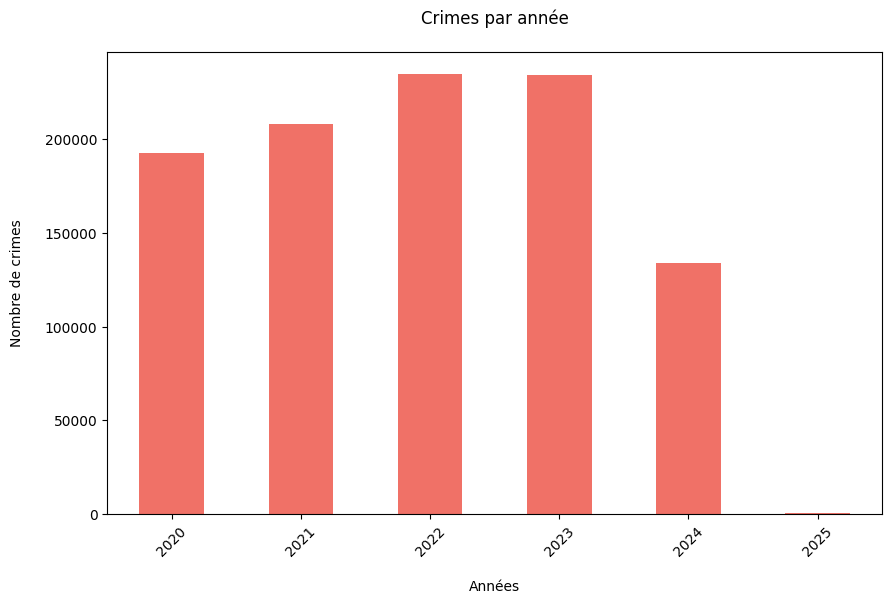

In [74]:
year_crime.plot(kind='bar',
                width=0.5,
                figsize=(10, 6),
                color="#f07167")
plt.xlabel('Années', labelpad=15)
plt.ylabel('Nombre de crimes', labelpad=15)
plt.title('Crimes par année', pad=20)
plt.xticks(rotation=45)
plt.show()

<style>
    .conclusion {
        color: #f07167;
    }
</style>
<span class="conclusion">Conclusion:</span> Les données révèlent que la criminalité a augmenté graduellement depuis 2020 et a atteint son pic en 2022. Depuis, elle chute graduellement pour atteindre son niveau le plus bas sur 6 ans en 2025 (mis à jour pour la dernière fois le 1er octobre 2025)

### Crime par mois

_Quel mois de l'année est plus sujet au crime ?_

In [75]:
data['Month'] = data['DATE OCC'].dt.month

In [76]:
month_crimes = data.groupby(['Year', 'Month']).size().reset_index(name='Crimes').sort_values('Crimes', ascending=False)
month_crimes

,Year,Month,Crimes
28,2022,5,20496
33,2022,10,20317
45,2023,10,20298
36,2023,1,20294
29,2022,6,20248
...,...,...,...
68,2025,9,5
70,2025,11,4
67,2025,8,2
65,2025,6,2


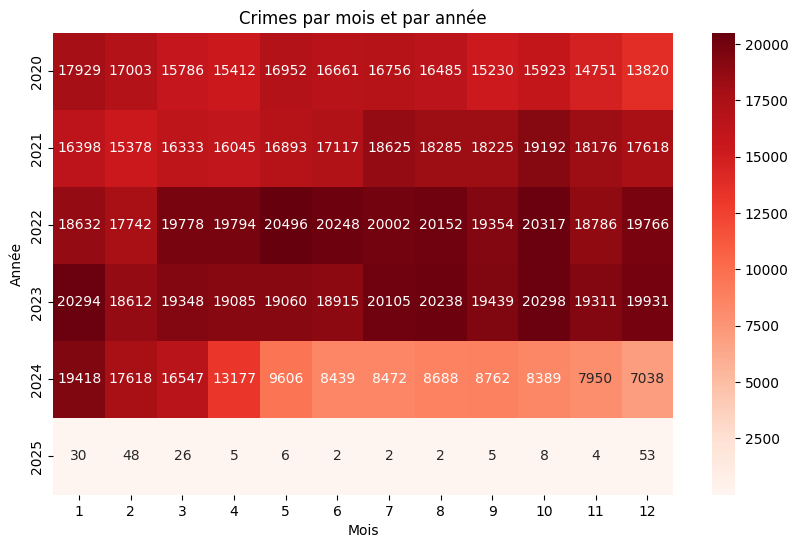

In [77]:
pivot = month_crimes.pivot(index="Year", columns='Month', values="Crimes")
plt.figure(figsize=(10,6))
sns.heatmap(pivot, annot=True, fmt="d", cmap="Reds")
plt.title("Crimes par mois et par année")
plt.xlabel("Mois")
plt.ylabel("Année")
plt.show()

La heatmap des crimes par mois par an montre les mois les plus dangereux par an : 

2020 - janvier
2021 - octobre (relativement constant depuis juillet jusqu'à retomber en décembre)
2022 - mai (constant entre mars et décembre)
2023 - octobre (relativement constant entre juillet et janvier)
2024 - janvier (avec chute graduelle relativement sur toute l'année)
2025 - avec le manque de données suffisantes, il convient d'éviter toute conclusion pour le moment

### Sur les 5 dernières années, quels mois ont vu le plus de crimes ?

In [78]:
total_months = data.groupby("Month").size().reset_index(name="Crimes").sort_values("Crimes", ascending=False)

Convertissons les mois en lettres

In [79]:
total_months['Month'] = total_months['Month'].apply(lambda x: calendar.month_name[int(x)])

In [80]:
total_months

,Month,Crimes
0,January,92701
2,March,87818
1,February,86401
9,October,84127
6,July,83962
7,August,83850
3,April,83518
4,May,83013
5,June,81382
8,September,81015


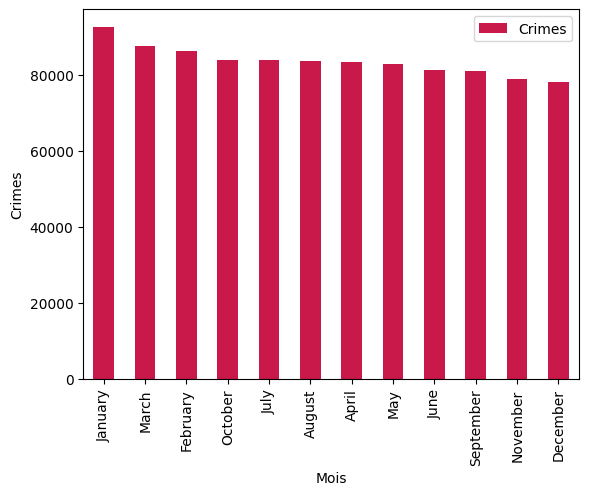

In [81]:
total_months.plot(
    kind='bar',
    x='Month',
    y='Crimes',
    color='#c9184a',
    ylabel="Crimes",
    xlabel="Mois"
)
plt.show()

<style>
    .jan{
        color: #c9184a;
    }
</style>
_Les données disponibles montrent que le mois de <span class="jan">Janvier</span>**(92701)** est le mois le plus dangereux à Los Angeles sur les 5 dernières années._

## À quelle heure la criminalité atteint son pic à Los Angeles ?

In [82]:
data[data['TIME OCC'] <= 99]

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Weapon Desc,Status,Status Desc,Crm Cd 1,LOCATION,Cross Street,LAT,LON,Year,Month
10,240605846,2024-02-06,2020-06-20,1,6,Hollywood,657,2,812,CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 ...,...,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AA,Adult Arrest,812.0,1000 N RIDGEWOOD PL,PRECISE ADRESS,34.0878,-118.3146,2024,6
73,201817357,2020-09-12,2020-09-12,30,18,Southeast,1871,2,930,CRIMINAL THREATS - NO WEAPON DISPLAYED,...,VERBAL THREAT,IC,Invest Cont,930.0,ROSECRANS,VERMONT,33.9019,-118.2916,2020,9
125,202010333,2020-05-27,2020-05-13,1,20,Olympic,2036,2,354,THEFT OF IDENTITY,...,NO WEAPON,IC,Invest Cont,354.0,600 S BERENDO ST,PRECISE ADRESS,34.0608,-118.2941,2020,5
150,201418155,2020-10-03,2020-10-03,30,14,Pacific,1407,2,888,TRESPASSING,...,NO WEAPON,IC,Invest Cont,888.0,10000 NATIONAL BL,PRECISE ADRESS,34.0291,-118.4036,2020,10
165,201820205,2020-11-08,2020-11-08,10,18,Southeast,1871,1,510,VEHICLE - STOLEN,...,NO WEAPON,IC,Invest Cont,510.0,14200 S VERMONT AV,PRECISE ADRESS,33.9026,-118.2916,2020,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004741,241312564,2024-08-27,2024-08-23,30,13,Newton,1321,1,330,BURGLARY FROM VEHICLE,...,NO WEAPON,IC,Invest Cont,330.0,2500 S GRAND AV,PRECISE ADRESS,34.0274,-118.2717,2024,8
1004785,240905882,2024-02-20,2024-02-19,1,9,Van Nuys,923,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,NO WEAPON,IC,Invest Cont,740.0,14600 GILMORE ST,PRECISE ADRESS,34.1877,-118.4509,2024,2
1004793,241313601,2024-10-03,2024-10-03,1,13,Newton,1365,1,510,VEHICLE - STOLEN,...,NO WEAPON,IC,Invest Cont,510.0,1300 E 53RD ST,PRECISE ADRESS,33.9994,-118.2499,2024,10
1004806,242113291,2024-11-21,2024-11-14,1,21,Topanga,2189,1,440,THEFT PLAIN - PETTY ($950 & UNDER),...,NO WEAPON,IC,Invest Cont,440.0,20600 VENTURA BL,PRECISE ADRESS,34.1674,-118.5821,2024,11


<span style="color: #bc6c25">Problème</span> : Je constate que la colonne des heures contient des données aberrantes et d'autres qui ne suivent pas le format standard.

Mes recherches externes me montrent que ces chiffres pourraient être des minutes d'évènement qui se sont produits au-delà de 00h. Je vais donc les considérer comme des minutes.

In [83]:
data['Heure'] = data['TIME OCC'].astype(str).str.zfill(4)

In [84]:
data['Heure'] = data['Heure'].apply(lambda x: int(x[:2]))

In [85]:
heures = data.groupby('Heure').size().reset_index(name="Crimes")

In [86]:
heures

,Heure,Crimes
0,0,40468
1,1,29761
2,2,25214
3,3,22191
4,4,18757
5,5,17290
6,6,23185
7,7,26267
8,8,37249
9,9,36524


Text(0.5, 1.0, 'Le nombre de crimes par heure à Los Angeles')

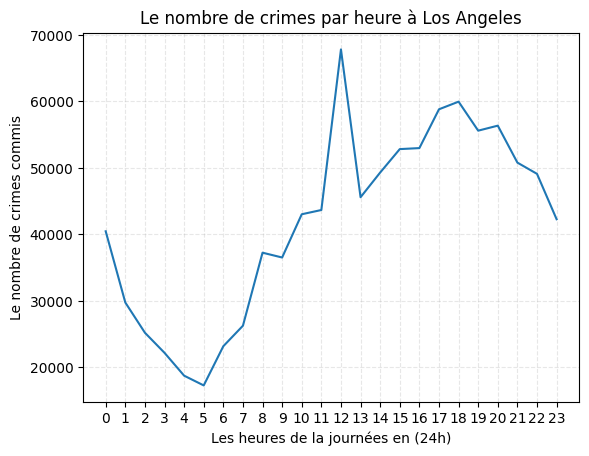

In [87]:
plt.plot(heures['Heure'], heures['Crimes'])
plt.xticks(range(24))
plt.grid(True, alpha=0.3, linestyle='--')
plt.xlabel("Les heures de la journées en (24h)")
plt.ylabel("Le nombre de crimes commis")
plt.title("Le nombre de crimes par heure à Los Angeles")

Le graphe des données disponibles nous montre que <span style="color: #ef476f">5h</span> est l'heure de la journée où le crime est plus bas, alors qu'il atteint son pic à <span style="color: #ef476f">12h</span>.

## À quelle heure de la nuit la criminalité atteint son pic à Los Angeles ?

_Pour ceci, je choisis comme nuit les heures comprises entre 22h et 4h du matin. C'est le moment où les gens dorment. Je m'arrête avant le minimum que j'avais trouvé_

### Convertissons l'heure militaire en datetime

In [88]:
data['TIME OCC'] = data['TIME OCC'].astype(str).str.zfill(4)
data['TIME OCC'] = data['TIME OCC'].str.slice(0, 2) + ":" + data['TIME OCC'].str.slice(2, 4)

In [89]:
data['TIME OCC'] = pd.to_datetime(data['TIME OCC'], format="%H:%M", errors="coerce").dt.time
data

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,LOCATION,Cross Street,LAT,LON,Year,Month,Heure
0,211507896,2021-04-11,2020-11-07,08:45:00,15,N Hollywood,1502,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,7800 BEEMAN AV,PRECISE ADRESS,34.2124,-118.4092,2021,11,8
1,201516622,2020-10-21,2020-10-18,18:45:00,15,N Hollywood,1521,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,ATOLL AV,N GAULT,34.1993,-118.4203,2020,10,18
2,240913563,2024-12-10,2020-10-30,12:40:00,9,Van Nuys,933,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,14600 SYLVAN ST,PRECISE ADRESS,34.1847,-118.4509,2024,10,12
3,210704711,2020-12-24,2020-12-24,13:10:00,7,Wilshire,782,1,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,...,IC,Invest Cont,331.0,6000 COMEY AV,PRECISE ADRESS,34.0339,-118.3747,2020,12,13
4,201418201,2020-10-03,2020-09-29,18:30:00,14,Pacific,1454,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,IC,Invest Cont,420.0,4700 LA VILLA MARINA,PRECISE ADRESS,33.9813,-118.4350,2020,9,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004986,252104112,2025-02-02,2025-02-02,01:30:00,21,Topanga,2103,2,946,OTHER MISCELLANEOUS CRIME,...,IC,Invest Cont,946.0,22100 ROSCOE BL,PRECISE ADRESS,34.2259,-118.6126,2025,2,1
1004987,250404100,2025-02-18,2025-02-18,10:00:00,4,Hollenbeck,479,2,237,CHILD NEGLECT (SEE 300 W.I.C.),...,IC,Invest Cont,237.0,3500 PERCY ST,PRECISE ADRESS,34.0277,-118.1979,2025,2,10
1004988,251304095,2025-01-31,2025-01-30,15:54:00,13,Newton,1372,2,850,INDECENT EXPOSURE,...,IC,Invest Cont,850.0,300 E 53RD ST,PRECISE ADRESS,33.9942,-118.2701,2025,1,15
1004989,251704066,2025-01-17,2025-01-17,16:00:00,17,Devonshire,1774,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,9600 ZELZAH AV,PRECISE ADRESS,34.2450,-118.5233,2025,1,16


_Je crée un mask afin de sélectionner les crimes qui entrent dans la plage horraire de nuit définie_

In [90]:
#Les limites de la nuit sont convertis en time pour la sélection

start_time_1 = pd.to_datetime("22:00:00").time()
end_time_1 = pd.to_datetime("23:59").time()
start_time_2 = pd.to_datetime("00:00").time()
end_time_2 = pd.to_datetime("4:00").time()


In [91]:
data_night = data[(
    (data['TIME OCC'] >= start_time_1) & (data['TIME OCC'] <= end_time_1) |
    (data['TIME OCC'] >= start_time_2) & (data['TIME OCC'] <= end_time_2)
)]

In [92]:
data_night

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,LOCATION,Cross Street,LAT,LON,Year,Month,Heure
10,240605846,2024-02-06,2020-06-20,00:01:00,6,Hollywood,657,2,812,CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 ...,...,AA,Adult Arrest,812.0,1000 N RIDGEWOOD PL,PRECISE ADRESS,34.0878,-118.3146,2024,6,0
14,201406733,2020-02-16,2020-02-13,23:00:00,14,Pacific,1406,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,3300 MOTOR AV,PRECISE ADRESS,34.0240,-118.4090,2020,2,23
18,201514848,2020-09-04,2020-08-17,04:00:00,15,N Hollywood,1549,1,310,BURGLARY,...,AA,Adult Arrest,310.0,11100 CUMPSTON ST,PRECISE ADRESS,34.1700,-118.3722,2020,8,4
27,201915689,2020-10-15,2020-10-15,03:05:00,19,Mission,1918,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,13600 FOOTHILL BL,PRECISE ADRESS,34.3069,-118.4297,2020,10,3
29,202013248,2020-08-09,2020-08-09,22:50:00,20,Olympic,2069,2,626,INTIMATE PARTNER - SIMPLE ASSAULT,...,AA,Adult Arrest,626.0,1200 S WESTMORELAND AV,PRECISE ADRESS,34.0495,-118.2891,2020,8,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004940,251004149,2025-02-12,2025-02-11,22:30:00,10,West Valley,1001,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,8200 VANALDEN AV,PRECISE ADRESS,34.2193,-118.5492,2025,2,22
1004948,250104175,2025-02-12,2025-02-12,03:40:00,1,Central,127,2,946,OTHER MISCELLANEOUS CRIME,...,AA,Adult Arrest,946.0,100 N LOS ANGELES ST,PRECISE ADRESS,34.0515,-118.2424,2025,2,3
1004958,250300002,2025-02-26,2025-02-25,23:15:00,3,Southwest,358,1,510,VEHICLE - STOLEN,...,IC,Invest Cont,510.0,1000 W 34TH ST,PRECISE ADRESS,34.0243,-118.2876,2025,2,23
1004966,252104137,2025-03-09,2025-03-09,00:30:00,21,Topanga,2187,2,946,OTHER MISCELLANEOUS CRIME,...,IC,Invest Cont,946.0,21000 VENTURA BL,PRECISE ADRESS,34.1667,-118.5908,2025,3,0


In [93]:
nightcrimes = data_night.groupby("Heure").size().reset_index(name='crimes')

In [94]:
100 * nightcrimes['crimes'].sum() / len(data)

np.float64(21.435017826030283)

_Les données montrent que la journée concentre le plus de criminalités à Los Angeles, avec seulement 21.44% la nuit_

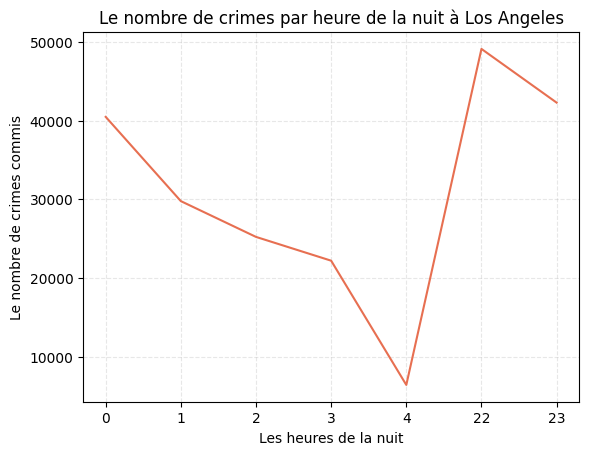

In [95]:
x_positions = range(len(nightcrimes))
plt.plot(x_positions, nightcrimes['crimes'], color="#e76f51")
plt.xticks(x_positions, nightcrimes['Heure'])
plt.grid(True, alpha=0.3, linestyle='--')
plt.xlabel("Les heures de la nuit")
plt.ylabel("Le nombre de crimes commis")
plt.title("Le nombre de crimes par heure de la nuit à Los Angeles")
plt.show()

Le graphique tracé sur la base des données disponibles montre que <span style="color: #ff4d6d">22h</span> est l'heure de la nuit où la criminalité est la plus élevée.

## À quel moment de la semaine le crime est-il plus élevé ?

In [96]:
data['is_weekend'] = (data['DATE OCC'].dt.dayofweek >= 5).astype(int)

In [97]:
weekcrimes = data['is_weekend'].value_counts().reset_index(name="crimes")

In [98]:
weekcrimes['percentage'] = (100 * (weekcrimes['crimes'] / len(data))).round(2)

In [99]:
weekcrimes

,is_weekend,crimes,percentage
0,0,717884,71.43
1,1,287107,28.57


Les données montrent que <span style="color: #fb8500"> 71.43%</span> des crimes sont commis en semaine contre <span style="color: #fb8500"> 28.43%</span> en week-end

## Le sexe le plus vulnérable à Los Angeles

In [100]:
vict_sexe = data['Vict Sex'].value_counts().reset_index(name="nbr victimes")
vict_sexe['percentage'] = (100 * vict_sexe['nbr victimes'] / len(data)).round(2)

In [101]:
vict_sexe

,Vict Sex,nbr victimes,percentage
0,M,403879,40.19
1,F,358580,35.68
2,NO VICTIM,144639,14.39
3,X,97778,9.73
4,H,114,0.01
5,-,1,0.00


Les données montrent que les hommes semblent le sexe le plus vulnérable à Los Angeles, représentant 40.19% des victimes. Les femmes représentent 35.68% des victimes

## Quelle zone a le taux de criminalité le plus élevé à Los Angeles ?

In [102]:
location_crimes = data.groupby("AREA NAME").size().reset_index(name="Crimes").sort_values("Crimes", ascending=False)

In [103]:
high_location_crimes = location_crimes.head(5)

_Tracer un graphe qui montre les zones les plus dangereuses_

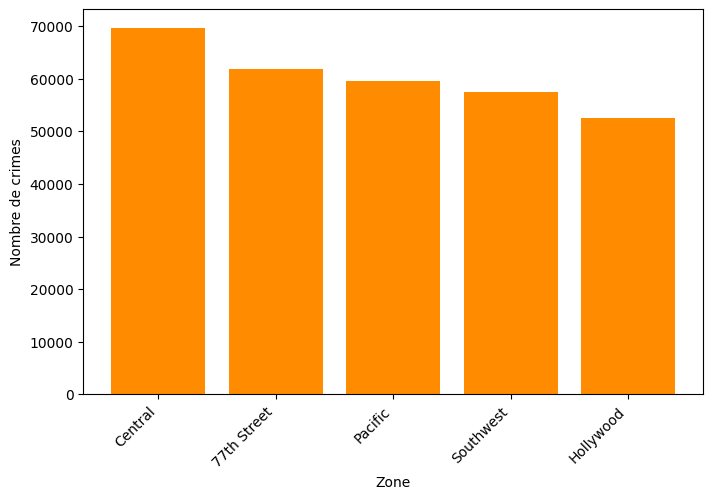

In [104]:
plt.figure(figsize=(8,5))
plt.bar(high_location_crimes['AREA NAME'], high_location_crimes['Crimes'], color="darkorange")
plt.xlabel("Zone")
plt.ylabel("Nombre de crimes")
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.show()

D'après les données, <span style="color: red">Central</span> est la zone avec le taux de criminalité le plus élevé à Los Angeles

## Quelle zone a le taux de criminalité le plus faible à Los Angeles ?

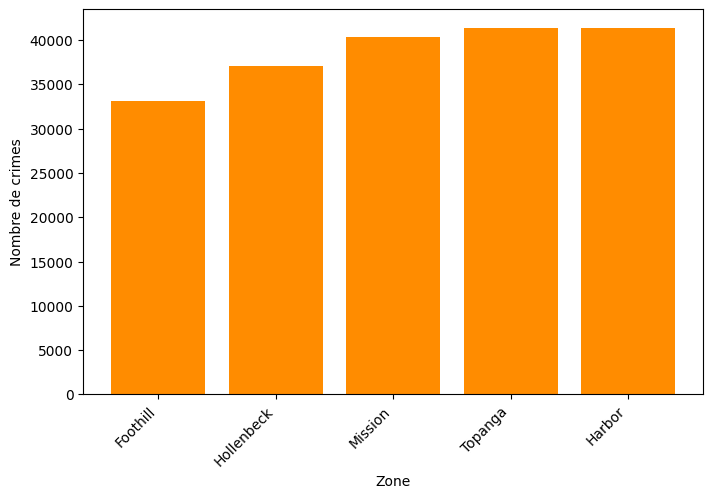

In [105]:
low_location_crimes = location_crimes.tail(5).sort_values("Crimes")

plt.figure(figsize=(8,5))
plt.bar(low_location_crimes['AREA NAME'], low_location_crimes['Crimes'], color="darkorange")
plt.xlabel("Zone")
plt.ylabel("Nombre de crimes")
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.show()

D'après le graphe des données disponibles, <span style="color: red">Foothill</span> est la zone avec le plus faible de taux de criminalité à Los Angeles

## Quel est le groupe d'âge le plus victimisé à Los Angeles ?

_Regroupons l'âge des victimes selon des plages, car le nombre des âges est élevé_

In [106]:
bins = [0, 17, 25, 34, 44, 54, 64, np.inf]
labels = ['0-17', '18-25', '26-34', '35-44', '45-54', '55-64', '65+']
data["Age Bracket"] = pd.cut(data['Vict Age'], bins=bins, labels=labels)

In [107]:
data

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Crm Cd 1,LOCATION,Cross Street,LAT,LON,Year,Month,Heure,is_weekend,Age Bracket
0,211507896,2021-04-11,2020-11-07,08:45:00,15,N Hollywood,1502,2,354,THEFT OF IDENTITY,...,354.0,7800 BEEMAN AV,PRECISE ADRESS,34.2124,-118.4092,2021,11,8,1,26-34
1,201516622,2020-10-21,2020-10-18,18:45:00,15,N Hollywood,1521,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,230.0,ATOLL AV,N GAULT,34.1993,-118.4203,2020,10,18,1,26-34
2,240913563,2024-12-10,2020-10-30,12:40:00,9,Van Nuys,933,2,354,THEFT OF IDENTITY,...,354.0,14600 SYLVAN ST,PRECISE ADRESS,34.1847,-118.4509,2024,10,12,0,26-34
3,210704711,2020-12-24,2020-12-24,13:10:00,7,Wilshire,782,1,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,...,331.0,6000 COMEY AV,PRECISE ADRESS,34.0339,-118.3747,2020,12,13,0,45-54
4,201418201,2020-10-03,2020-09-29,18:30:00,14,Pacific,1454,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,420.0,4700 LA VILLA MARINA,PRECISE ADRESS,33.9813,-118.4350,2020,9,18,0,55-64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004986,252104112,2025-02-02,2025-02-02,01:30:00,21,Topanga,2103,2,946,OTHER MISCELLANEOUS CRIME,...,946.0,22100 ROSCOE BL,PRECISE ADRESS,34.2259,-118.6126,2025,2,1,1,35-44
1004987,250404100,2025-02-18,2025-02-18,10:00:00,4,Hollenbeck,479,2,237,CHILD NEGLECT (SEE 300 W.I.C.),...,237.0,3500 PERCY ST,PRECISE ADRESS,34.0277,-118.1979,2025,2,10,0,0-17
1004988,251304095,2025-01-31,2025-01-30,15:54:00,13,Newton,1372,2,850,INDECENT EXPOSURE,...,850.0,300 E 53RD ST,PRECISE ADRESS,33.9942,-118.2701,2025,1,15,0,0-17
1004989,251704066,2025-01-17,2025-01-17,16:00:00,17,Devonshire,1774,2,624,BATTERY - SIMPLE ASSAULT,...,624.0,9600 ZELZAH AV,PRECISE ADRESS,34.2450,-118.5233,2025,1,16,0,0-17


In [108]:
victim_ages = data["Age Bracket"].value_counts().reset_index(name="Crimes")

In [109]:
victim_ages['percentage'] = (100 * victim_ages["Crimes"] / len(data)).round(2)
victim_ages

,Age Bracket,Crimes,percentage
0,26-34,186103,18.52
1,35-44,162147,16.13
2,18-25,114074,11.35
3,45-54,112739,11.22
4,55-64,79458,7.91
5,65+,55513,5.52
6,0-17,25598,2.55


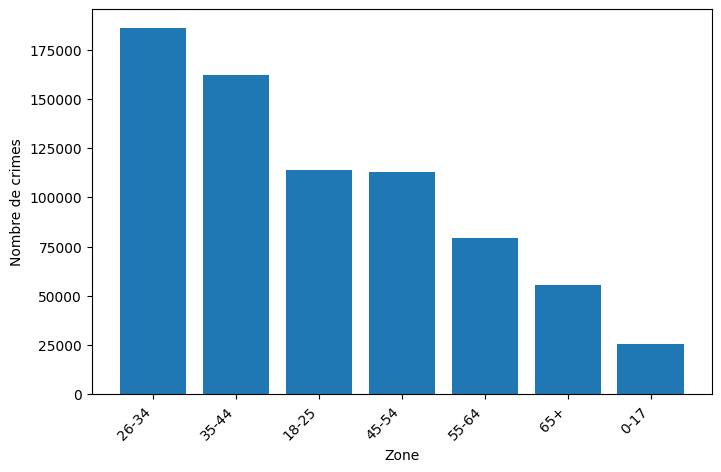

In [110]:
plt.figure(figsize=(8,5))
plt.bar(victim_ages['Age Bracket'], victim_ages['Crimes'])
plt.xlabel("Zone")
plt.ylabel("Nombre de crimes")
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.show()

Le graphe des données disponibles nous montre que le groupe d'âge le plus vulnérable à Los Angeles est celui des <span style="color: #1982c4">26 à 35 ans</span> représentant 18.52% des victimes. Les mineurs et séniors constituent les couches de populations les moins vulnérables, avec respestivement 2.55% et 5.52% des victimes.

## Les crimes les plus commis à Los Angeles

In [111]:
crimes_list = data.groupby(['Crm Cd', 'Crm Cd Desc']).size().reset_index(name='crime rate').sort_values('crime rate', ascending=False)
crimes_list['percentage'] = (100 * crimes_list['crime rate'] / len(data)).round(2)

In [112]:
crimes_list.head(20)

,Crm Cd,Crm Cd Desc,crime rate,percentage
57,510,VEHICLE - STOLEN,115190,11.46
62,624,BATTERY - SIMPLE ASSAULT,74839,7.45
15,330,BURGLARY FROM VEHICLE,63517,6.32
26,354,THEFT OF IDENTITY,62537,6.22
80,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",61092,6.08
13,310,BURGLARY,57871,5.76
38,440,THEFT PLAIN - PETTY ($950 & UNDER),53717,5.35
6,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",53525,5.33
64,626,INTIMATE PARTNER - SIMPLE ASSAULT,46712,4.65
28,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),41314,4.11


In [148]:
vehicule_vol = data[data['Crm Cd'] == 510]

In [149]:
vehicule_vol

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Crm Cd 1,LOCATION,Cross Street,LAT,LON,Year,Month,Heure,is_weekend,Age Bracket
12,202113531,2020-09-06,2020-09-05,15:00:00,21,Topanga,2149,1,510,VEHICLE - STOLEN,...,510.0,19700 VANOWEN ST,PRECISE ADRESS,34.1938,-118.5631,2020,9,15,1,NaN
31,201811813,2020-05-28,2020-05-25,02:00:00,18,Southeast,1851,1,510,VEHICLE - STOLEN,...,510.0,MENLO AV,130TH ST,33.9144,-118.2894,2020,5,2,0,NaN
39,201416348,2020-08-30,2020-08-28,12:00:00,14,Pacific,1453,1,510,VEHICLE - STOLEN,...,510.0,4000 GLENCOE AV,PRECISE ADRESS,33.9918,-118.4446,2020,8,12,0,NaN
54,201904694,2020-01-16,2020-01-15,21:30:00,19,Mission,1901,1,510,VEHICLE - STOLEN,...,510.0,FOOTHILL,BALBOA,34.3193,-118.4871,2020,1,21,0,NaN
59,201513536,2020-08-05,2020-08-04,07:30:00,15,N Hollywood,1557,1,510,VEHICLE - STOLEN,...,510.0,4900 CARTWRIGHT AV,PRECISE ADRESS,34.1595,-118.3637,2020,8,7,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004922,250400004,2025-02-26,2025-02-26,09:15:00,4,Hollenbeck,477,1,510,VEHICLE - STOLEN,...,510.0,800 EUCLID AV,PRECISE ADRESS,34.0322,-118.2117,2025,2,9,0,NaN
1004944,251204103,2025-01-22,2025-01-21,05:00:00,12,77th Street,1259,1,510,VEHICLE - STOLEN,...,510.0,7800 MCKINLEY AV,PRECISE ADRESS,33.9685,-118.2608,2025,1,5,0,NaN
1004958,250300002,2025-02-26,2025-02-25,23:15:00,3,Southwest,358,1,510,VEHICLE - STOLEN,...,510.0,1000 W 34TH ST,PRECISE ADRESS,34.0243,-118.2876,2025,2,23,0,NaN
1004967,2503,2025-03-10,2025-03-06,17:00:00,3,Southwest,358,1,510,VEHICLE - STOLEN,...,510.0,600 CHILDS WY,PRECISE ADRESS,34.0189,-118.2819,2025,3,17,0,NaN


### 1. Vol de véhicules

Les données montrent que le crime <span style=" color: cyan">510 = Vol de véhicules</span> est le plus commis à Los Angeles, représentant 11.46% des crimes. 

In [150]:
crimes_hours =  vehicule_vol['Heure'].value_counts().reset_index(name="crimes").sort_values("Heure")

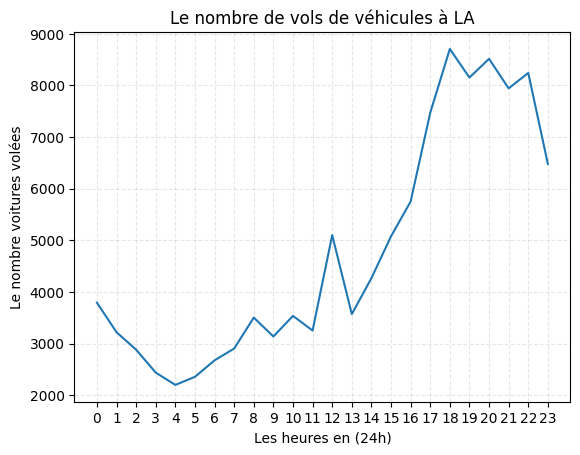

In [151]:
x_positions = range(len(crimes_hours))
plt.plot(x_positions, crimes_hours['crimes'])
plt.xticks(x_positions, crimes_hours['Heure'])
plt.grid(True, alpha=0.3, linestyle='--')
plt.xlabel("Les heures en (24h)")
plt.ylabel("Le nombre voitures volées")
plt.title("Le nombre de vols de véhicules à LA")
plt.show()

Selon les données, ce vol de véhicules connait un pic à <span style="color: hotpink"> 12h</span> et monte en flèche à partir de <span style="color: hotpink"> 16h</span>, atteignant son pic à <span style="color: hotpink"> 18h</span>. Il reste contant jusqu'à <span style="color: hotpink"> 23h</span> avant de chuter à <span style="color: hotpink"> 00h</span>.

In [ ]:
age_vehicule_stole = data['Age Bracket'].value_counts().reset_index(name="vehicule stolen")

In [ ]:
age_vehicule_stole

,Age Bracket,vehicule stolen
0,26-34,186103
1,35-44,162147
2,18-25,114074
3,45-54,112739
4,55-64,79458
5,65+,55513
6,0-17,25598


Les données montrent que les personnes dans la tranche d'âge de <span style="color: hotpink"> 26 à 44 ans</span> sont les plus vulnérables à ce crime.

### 2.Violence physique légère

Les données montrent que le crime <span style=" color: cyan">624 = Violence physique légère</span> est le deuxième plus commis à Los Angeles, représentant 7,45%. 

In [ ]:
crimes2_hours = data[data['Crm Cd'] == 624]

In [ ]:
crimes2_hours =  crimes2_hours['Heure'].value_counts().reset_index(name="crimes").sort_values("Heure")

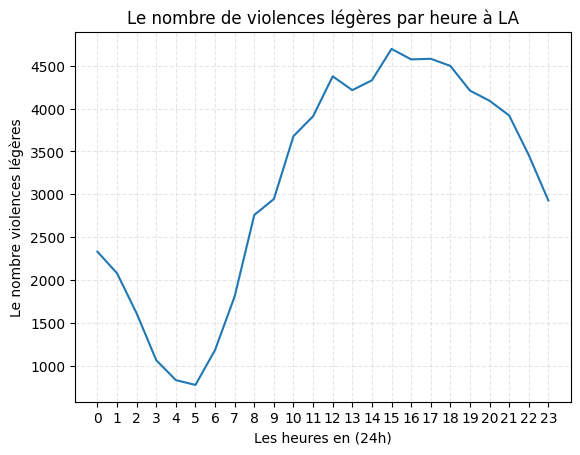

In [ ]:
x_positions = range(len(crimes2_hours))
plt.plot(x_positions, crimes2_hours['crimes'])
plt.xticks(x_positions, crimes2_hours['Heure'])
plt.grid(True, alpha=0.3, linestyle='--')
plt.xlabel("Les heures en (24h)")
plt.ylabel("Le nombre violences légères")
plt.title("Le nombre de violences légères par heure à LA")
plt.show()

Le graphe montre que les violences légères se produisent le plus en journée. Elles connaissent montent graduellement avec la journée. Dès 5h, plus l'heure avance, plus les violences augmentent. Elles connaissent un pic à 15h.

### 3. Cambriolage de véhicule

Selon les données, il représente 6.32% des crimes et se positionne à la troisième place des crimes les plus commis

In [114]:
data[data['Crm Cd'] == 330].iloc[:, 7:]

,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,...,Crm Cd 1,LOCATION,Cross Street,LAT,LON,Year,Month,Heure,is_weekend,Age Bracket
14,1,330,BURGLARY FROM VEHICLE,0344 1300,32,M,W,707.0,GARAGE/CARPORT,NO WEAPON,...,330.0,3300 MOTOR AV,PRECISE ADRESS,34.0240,-118.4090,2020,2,23,0,26-34
33,1,330,BURGLARY FROM VEHICLE,0344 1300,43,M,H,101.0,STREET,NO WEAPON,...,330.0,VENICE BL,INGLEWOOD BL,34.0056,-118.4301,2020,4,19,0,35-44
41,1,330,BURGLARY FROM VEHICLE,0344 0321,23,M,H,108.0,PARKING LOT,NO WEAPON,...,330.0,11000 VICTORY BL,PRECISE ADRESS,34.1867,-118.3703,2020,1,13,1,18-25
57,1,330,BURGLARY FROM VEHICLE,1606 0344,31,F,W,123.0,PARKING UNDERGROUND/BUILDING,NO WEAPON,...,330.0,3800 MCLAUGHLIN AV,PRECISE ADRESS,34.0086,-118.4246,2020,2,20,1,26-34
76,1,330,BURGLARY FROM VEHICLE,0344,47,M,W,101.0,STREET,NO WEAPON,...,330.0,200 REES ST,PRECISE ADRESS,33.9569,-118.4473,2020,6,3,0,45-54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004853,1,330,BURGLARY FROM VEHICLE,1300 1609 1307,31,F,H,504.0,OTHER RESIDENCE,NO WEAPON,...,330.0,FRANKLIN AV,IVAR AV,34.1053,-118.3290,2024,1,21,0,26-34
1004863,1,330,BURGLARY FROM VEHICLE,1307 0344,25,M,B,101.0,STREET,NO WEAPON,...,330.0,COMPTON AV,E WASHINGTON ST,34.0209,-118.2439,2024,5,1,1,18-25
1004878,1,330,BURGLARY FROM VEHICLE,0344 1300 1307,36,M,W,108.0,PARKING LOT,NO WEAPON,...,330.0,15300 SHERMAN WY,PRECISE ADRESS,34.2012,-118.4725,2024,1,22,0,35-44
1004909,1,330,BURGLARY FROM VEHICLE,0344 1302 0307,32,M,A,109.0,PARK/PLAYGROUND,NO WEAPON,...,330.0,2800 E OBSERVATORY RD,PRECISE ADRESS,34.1192,-118.3004,2025,2,16,0,26-34


Les données montrent également que l'usurpation d'identité arrive à la 4e position des crimes les plus commis à LA, représentant 6.22% des crimes. Il est suivi par le vandalisme. Il représente, quant à lui, 6.08% des crimes

## Quelle est l'origine raciale la plus vulnérable à LA ?

In [ ]:
origin_victims = data['Vict Descent'].value_counts().reset_index(name='Crimes')
origin_victims['percentage'] = (100 * origin_victims['Crimes'] / len(data)).round(2)

In [132]:
df_large = origin_victims[origin_victims["percentage"] >= 8]
df_small = origin_victims[origin_victims["percentage"] < 8]

In [133]:
others = pd.DataFrame({
    "Vict Descent": ["Others"],
    "Crimes": [df_small["Crimes"].sum()],
    "percentage": [df_small["percentage"].sum()]
})

In [134]:
df_large

,Vict Descent,Crimes,percentage
0,H,296404,29.49
1,W,201442,20.04
2,NO VICTIM,144639,14.39
3,B,135816,13.51
4,X,106702,10.62


In [136]:
ethnies = [" Hispanic/Latin/Mexican", "White", "NO VICTIM", "Black", "Unknown", "Others"]
df_plot = pd.concat([df_large, others], ignore_index=True)
df_plot['Vict Descent'] = ethnies
df_plot

,Vict Descent,Crimes,percentage
0,Hispanic/Latin/Mexican,296404,29.49
1,White,201442,20.04
2,NO VICTIM,144639,14.39
3,Black,135816,13.51
4,Unknown,106702,10.62
5,Others,119988,11.95


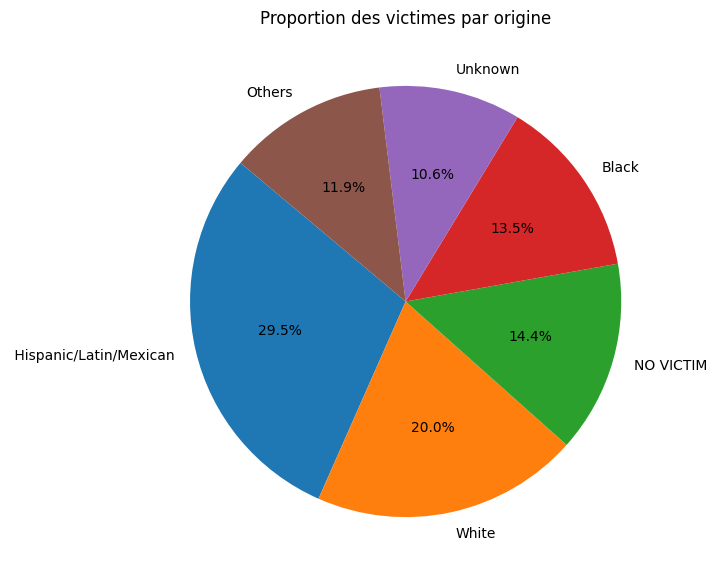

In [137]:
plt.figure(figsize=(7,7))
plt.pie(df_plot["percentage"], labels=df_plot["Vict Descent"], autopct='%1.1f%%', startangle=140)
plt.title("Proportion des victimes par origine")
plt.show()

Le graphe des données disponibles montre que les personnes ayant une origine  <span style="color: #a7c957">Hispanic/Latin/Mexican</span> sont les plus vulnérables à Los Angeles, avec 29.5%. Ils sont suivis des Blancs avec 20%. L'origine Noir arrive en troisième position avec 13.5%

In [145]:
weapon_table = data['Weapon Desc'].value_counts().reset_index(name="weapon").head(20)
weapon_table['percentage'] = (100 * weapon_table["weapon"] / len(data))
weapon_table

,Weapon Desc,weapon,percentage
0,NO WEAPON,677744,67.437818
1,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",174761,17.389310
2,UNKNOWN WEAPON/OTHER WEAPON,36390,3.620928
3,VERBAL THREAT,23846,2.372758
4,HAND GUN,20182,2.008177
5,SEMI-AUTOMATIC PISTOL,7267,0.723091
6,KNIFE WITH BLADE 6INCHES OR LESS,6838,0.680404
7,UNKNOWN FIREARM,6582,0.654931
8,OTHER KNIFE,5879,0.584980
9,MACE/PEPPER SPRAY,3730,0.371148


Ce tableau montre en un clin d'oeil la répartition des armes utilisées. Les données montrent que <span style="color: #ff8600">la violence physique</span> est la plus utilisée à Los Angeles.Certes, <span style="color: #ff8600">les armes à feu</span> son présentes, mais elles représentent une part secondaire dans les crimes à LA. Les plus identifiées sont notamment <span style="color: #ff8600">les armes de poing (2%)</span> et les <span style="color: #ff8600">les pistolets semi-automatique<span>